In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import os
import matplotlib.pyplot as plt

In [24]:
# Define constants
IMAGE_WIDTH, IMAGE_HEIGHT = 64, 64
BATCH_SIZE = 32
NUM_CLASSES = 10
NUM_EPOCHS = 100
PATIENCE = 5

In [25]:
# Define directory containing images
data_dir = '/media/official-biswadeb941/Biswadeb/Programming_Projects/Python_Projects/Mayabati/data/input/Images'

In [26]:
# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [29]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 160 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [30]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=PATIENCE, verbose=1)


In [31]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 [==============================] - 4s 759ms/step - loss: 2.4307 - accuracy: 0.0938 - val_loss: 2.3023 - val_accuracy: 0.1875
Epoch 2/100
5/5 [==============================] - 3s 685ms/step - loss: 2.2432 - accuracy: 0.1813 - val_loss: 2.2499 - val_accuracy: 0.1875
Epoch 3/100
5/5 [==============================] - 3s 596ms/step - loss: 2.1589 - accuracy: 0.2313 - val_loss: 2.1750 - val_accuracy: 0.2188
Epoch 4/100
5/5 [==============================] - 3s 588ms/step - loss: 1.9691 - accuracy: 0.3562 - val_loss: 2.0121 - val_accuracy: 0.3750
Epoch 5/100
5/5 [==============================] - 3s 573ms/step - loss: 1.7432 - accuracy: 0.4500 - val_loss: 2.1042 - val_accuracy: 0.2188
Epoch 6/100
5/5 [==============================] - 3s 585ms/step - loss: 1.6444 - accuracy: 0.4938 - val_loss: 2.0314 - val_accuracy: 0.2812
Epoch 7/100
5/5 [==============================] - 3s 597ms/step - loss: 1.4496 - accuracy: 0.6062 - val_loss: 2.0261 - val_accuracy: 0.2188
Epoch 8/100
5

In [32]:
# Save the trained model
model.save('/media/official-biswadeb941/Biswadeb/Programming_Projects/Python_Projects/Mayabati/data/output/Image_Model/Image.model')

INFO:tensorflow:Assets written to: /media/official-biswadeb941/Biswadeb/Programming_Projects/Python_Projects/Mayabati/data/output/Image_Model/Image.model/assets


INFO:tensorflow:Assets written to: /media/official-biswadeb941/Biswadeb/Programming_Projects/Python_Projects/Mayabati/data/output/Image_Model/Image.model/assets


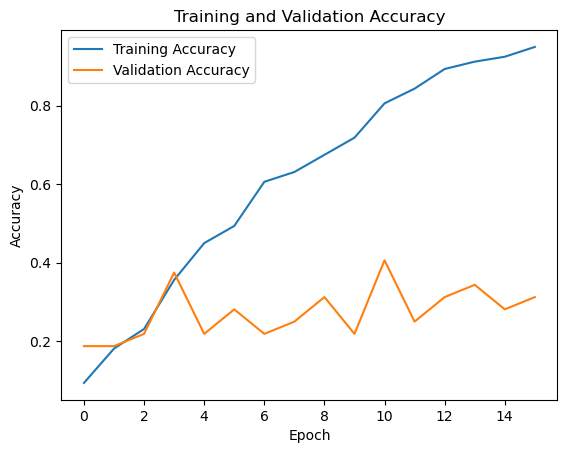

In [33]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

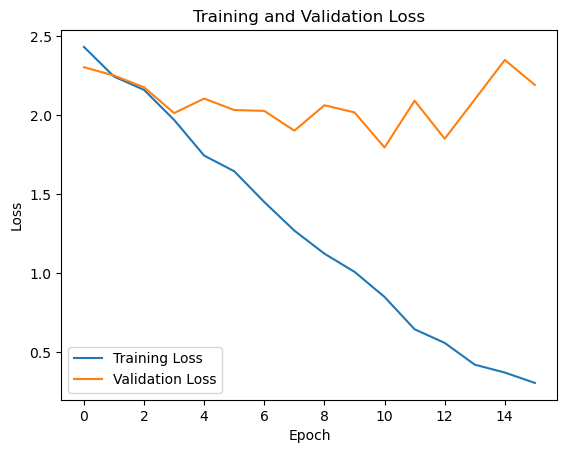

In [34]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()